In [27]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from spyglass.decoding.v1.sorted_spikes import SortedSpikesDecodingV1
import os
os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from Analysis.spiking_crosscorrelegram import crosscorrelegram, crosscorrelegram_stimulus_only, overlap_place_fields_crosscorrelegram
from Analysis.spiking_autocorrelegram import estimate_periodicity_timescale
from Analysis.spiking_place_fields import decoding_place_fields
from Analysis.utils import filter_opto_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# animal = "Totoro"
# period_ms = 165

# dataset_key = {
#     "animal": animal,
#     "period_ms": period_ms,
#     "min_pulse_lenth":20,
# }
animal = "Winnie"
targeted_phase = 90
dataset_key = {
    "animal": animal,
    "targeted_phase": targeted_phase,
    "min_pulse_lenth":20,
    "track_type": "lineartrack",
}

results, time,rates = overlap_place_fields_crosscorrelegram(dataset_key,min_place_distance=1,max_place_distance=8,min_spikes = 1000,gauss_smooth=.015,)

datasets: 4
('', 0)


datasets: 1
Processing Winnie20220717_.nwb with pos 11 valid times
linear_limits [10, 126.8923664781934]
number_units 224
('', 0)


datasets: 1
Processing Winnie20220717_.nwb with pos 3 valid times
linear_limits [10, 126.8923664781934]
number_units 144


Text(0.5, 0.98, "{'animal': 'Winnie', 'targeted_phase': 90, 'min_pulse_lenth': 20, 'track_type': 'lineartrack'}")

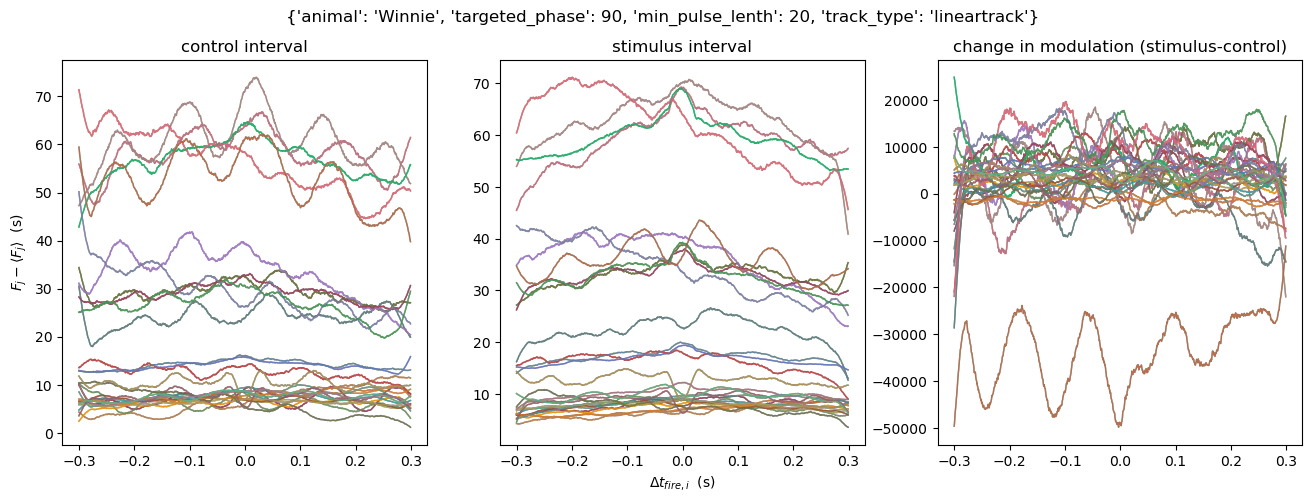

In [26]:
results[0].shape
# plt.plot(time[:-1],results[1].T/np.mean(results[1][:5,0],axis=0))
# plt.plot(time[:-1],results[0].T- (rates[0]*np.diff(time).mean()),alpha=.5,lw=1)

fig, ax = plt.subplots(ncols=3,figsize=(16,5),sharey=0,sharex=True)
ratio =0



if ratio:
    for i in range(2):
        val = results[i].T/np.diff(time).mean()/ (rates[i])
        # val[val.size//2] = np.nan
        ax[i].plot(time[:-1], val,alpha=.5,lw=1)
    change = 1* (results[0].T/np.diff(time).mean()/ (rates[0]) / (results[1].T/np.diff(time).mean()/ (rates[1]))) 
    ax[2].plot(time[:-1],change,alpha=.5,lw=1)
    
    # plt.yscale('log')
    ax[0].set_ylim(.5,10)
else:
    for i in range(2):
        val = results[i].T/np.diff(time).mean()- (rates[i])
        # val[val.shape[0]//2] = np.nan
        val = val-np.mean(val,axis=0)
        val = results[i].T
        ax[i].plot(time[:-1], val,alpha=.5,lw=1)
    # change = -1* (results[0].T/np.diff(time).mean()- (rates[0]) - (results[1].T/np.diff(time).mean()- (rates[1]))) 
    ax[2].plot(time[:-1],change,alpha=.5,lw=1)
    # plt.ylim(-5,5)
    



ax[1].set_xlabel("$\Delta t_{fire,i}$  (s)")

if ratio:
    ax[0].set_ylabel("$ F_j / \langle F_j \\rangle$  (s)")
else:
    ax[0].set_ylabel("$F_j-\langle F_j \\rangle$  (s)")
ax[0].set_title('control interval')
ax[1].set_title('stimulus interval')
ax[2].set_title('change in modulation (stimulus-control)')
# plt.xlim(-.02,.02)
# plt.xlim(-.050,.05)
# plt.ylim(1e-4,1e-2)
# plt.xlim(.08,.14)

fig.suptitle(dataset_key)

(-200.0, 200.0)

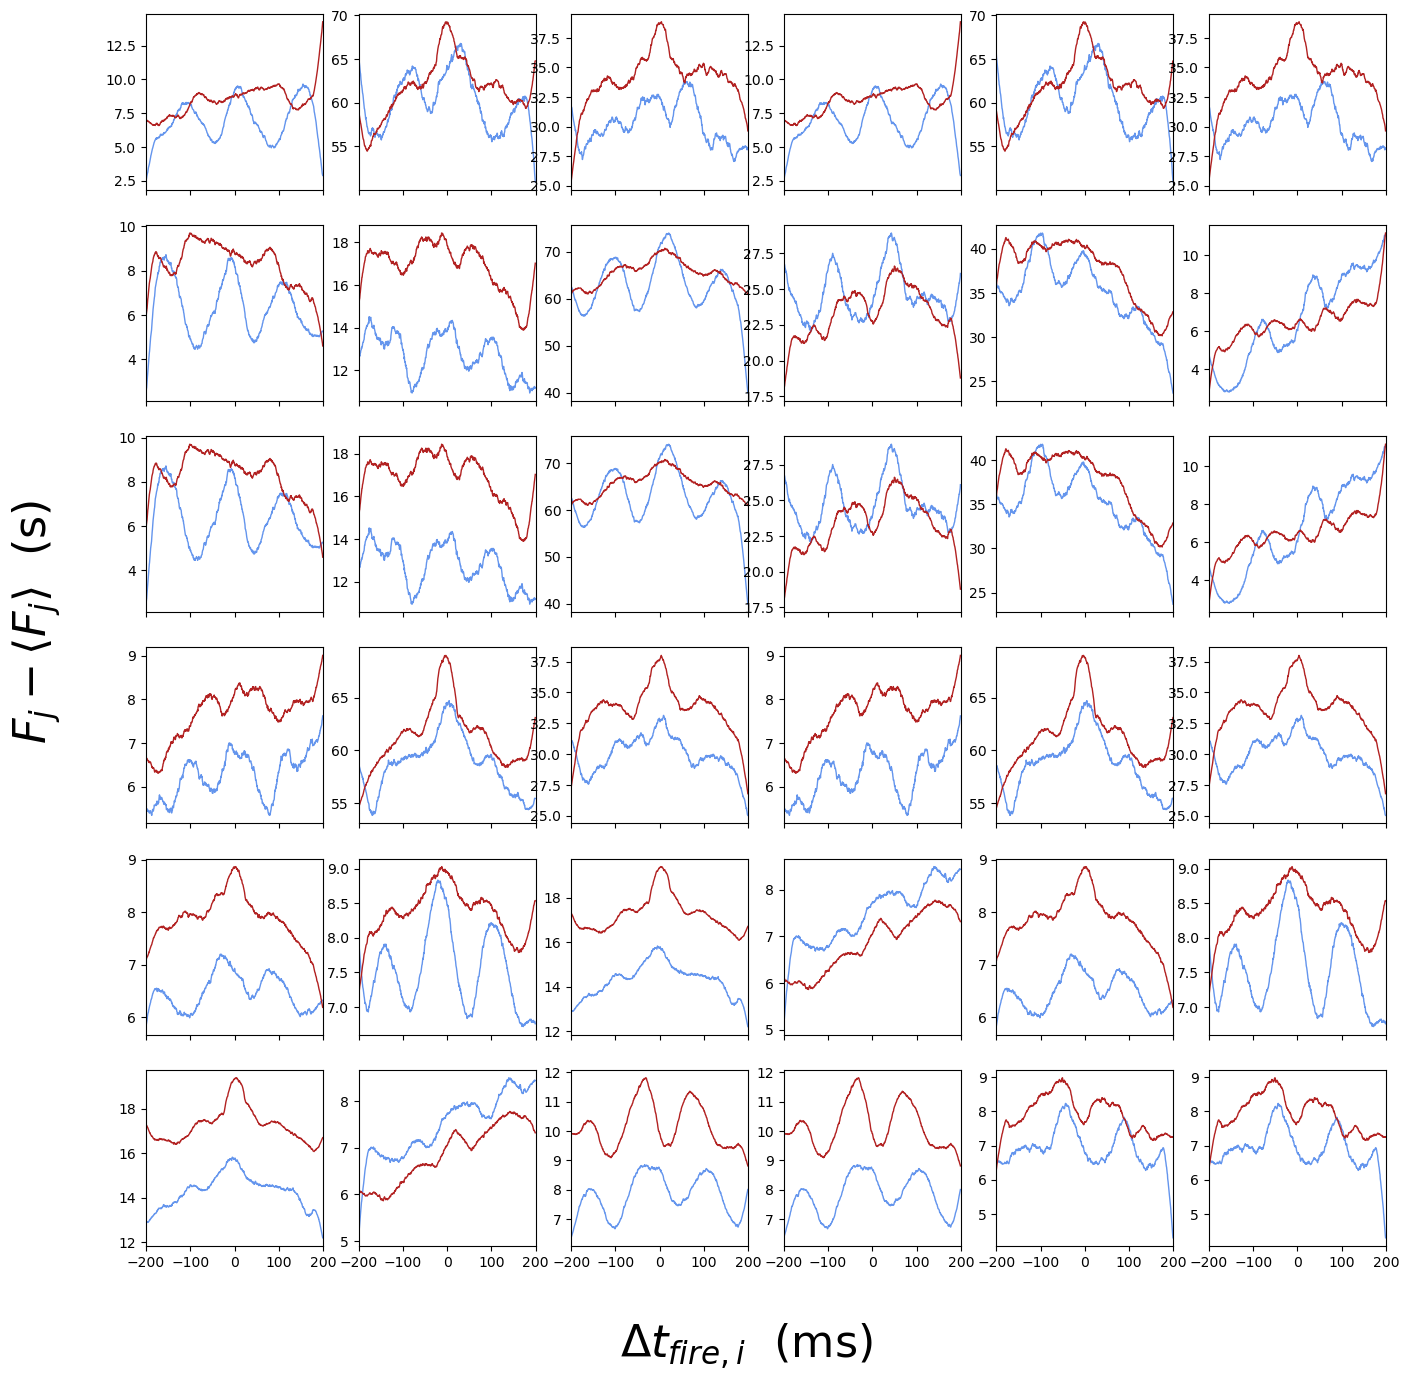

In [29]:
fig, ax = plt.subplots(ncols=6,nrows=6,sharex=True,sharey=0,figsize=(16,16))
ax = np.ravel(ax)

# val = [results[i].T/np.diff(time).mean()- (rates[i]) for i in range(2)]
# val = [v-np.mean(v,axis=0) for v in val]
val = [results[i].T for i in range(2)]

for j in range(len(ax)):
    colors = ['cornflowerblue','firebrick']
    if j>val[0].shape[1]-1:
        ax[j].set_visible(False)
        continue
    # ax[j].vlines(0,-5,5,linestyles='--',color='grey',alpha=.5)
    for i in range(2):
        ax[j].plot(time[:-1]*1000, val[i][:,j],alpha=1,lw=1,color=colors[i])
    # ax[j].plot(time[:-1]*1000, val[1][:,j]-val[0][:,j],alpha=1,lw=1,color=colors[0])
fig.text(0.5, 0.04, "$\Delta t_{fire,i}$  (ms)", ha='center',fontsize=32)
fig.text(0.04, 0.5, "$F_j-\langle F_j \\rangle$  (s)", va='center', rotation='vertical',fontsize=32)
# plt.ylim(-1,1)
# plt.xlabel()
# plt.ylabel()        
# plt.xlim(-20,20)
plt.xlim(-200,200)
# plt.ylim(-4,4)
# plt.xlim(0,200)